11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 34ms/step - accuracy: 0.8909 - loss: 0.3434 - val_accuracy: 0.9835 - val_loss: 0.0498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9848 - loss: 0.0473 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9880 - val_loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9888 - val_loss: 0.0338
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9909 - val_loss: 0.0302


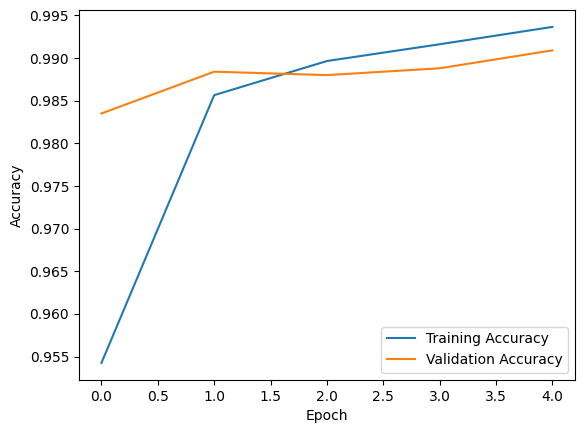

313/313 - 4s - 12ms/step - accuracy: 0.9909 - loss: 0.0302
Test accuracy: 0.9908999800682068


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
# The dataset is split into training and test data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape the data to add a channel dimension (needed for CNN)
# MNIST images are 28x28 pixels, and we need to add a channel dimension (1 for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1 (originally between 0 and 255)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Build the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a max-pooling layer with pool size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add another max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a final convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output before feeding it into a dense layer
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')